In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path

In [4]:
# select the experiment for which you want to analyse data
experiment_id = "exp1_2c33202_20251005_144135"

### Load Data

In [5]:
# set the paths
current_folder = globals()['_dh'][0]
results_path = os.path.join(current_folder,f'results/{experiment_id}')
figures_path = os.path.join(current_folder,'plots')

# read the results data
df_data = pd.read_csv(os.path.join(results_path, 'iteration_history.csv'), index_col=0)
df_data_agents = pd.read_csv(os.path.join(results_path, f'agent_histories.csv'), index_col=0)

### Plot Offer and Transaction Prices

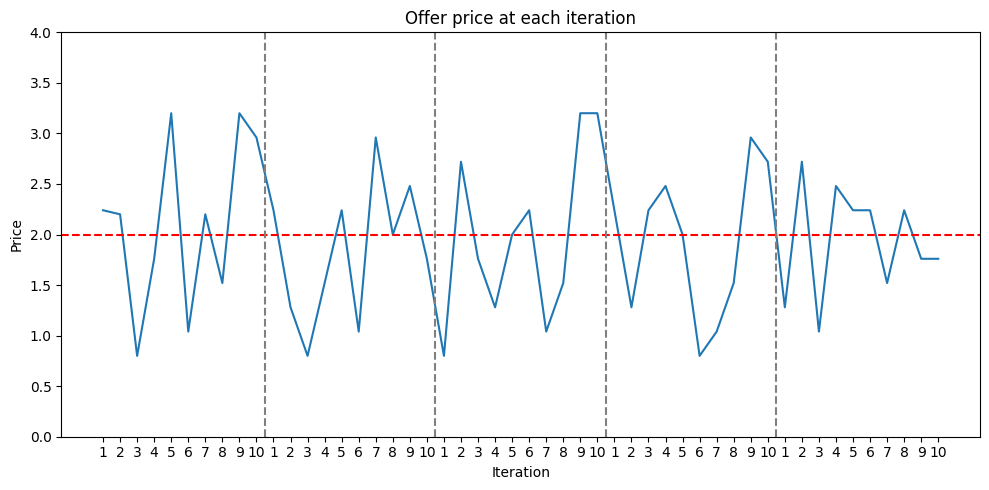

In [6]:
# collapse to one row per iteration
# TODO: this is incorrect NOW as there are multiple announcements per iteration!!!
df_plot = (
    df_data.groupby(["round", "iteration"], as_index=False)
      .agg({
          "price": "first",    
      })
)

# plot the offer prices
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='price', markers='0', data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title('Offer price at each iteration')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

In [7]:
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
df_plot


,index,round,iteration,price,announcement,transaction,announcement_type,announcing_agent_id,announcing_agent_reservation_price,responding_agent_id,responding_agent_reservation_price
0,1,1,1,2.24,True,True,buy,6,2.24,5,2.00
1,4,1,2,2.20,True,True,sell,2,1.28,10,3.20
2,13,1,3,0.80,True,True,buy,0,0.80,0,0.80
3,17,1,4,1.76,True,True,buy,4,1.76,1,1.04
4,26,1,5,2.00,True,True,buy,5,2.00,3,1.52
5,33,1,6,2.24,True,True,buy,9,2.96,6,2.24
6,34,1,7,2.20,True,True,sell,4,1.76,7,2.48
7,50,1,8,2.72,True,True,sell,8,2.72,8,2.72
8,89,2,1,2.24,True,True,buy,10,3.20,0,0.80
9,96,2,2,1.28,True,True,buy,2,1.28,2,1.28


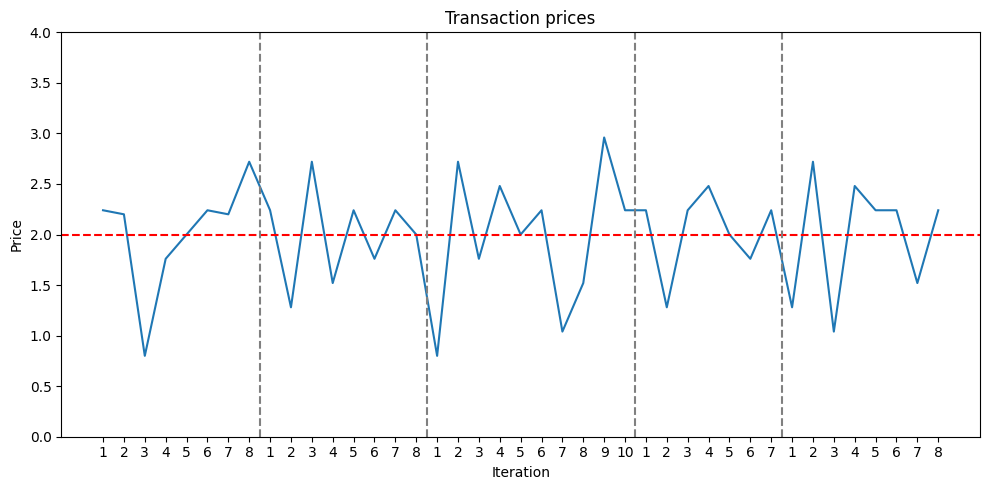

In [8]:
# plot the transaction prices
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='price', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title('Transaction prices')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

In [9]:
# avearage prices per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['price'].mean()

round
1    2.020000
2    2.000000
3    1.976000
4    2.034286
5    1.970000
Name: price, dtype: float64

In [10]:
# quantities sold per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['transaction'].count()

round
1     8
2     8
3    10
4     7
5     8
Name: transaction, dtype: int64

In [11]:
# transaction price deviation from equilibrium price per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['price'].std() / 2.0 * 100


round
1    28.081514
2    23.126979
3    35.077058
4    20.113961
5    30.383266
Name: price, dtype: float64

### Analyse Profits

In [12]:
# construct an implied profit column for each agents action
df_data_agents['implied_profit'] = np.where(
    df_data_agents['type'] == 'buyer',
    df_data_agents['reservation_price'] - df_data_agents['price'],  # buyer profit
    df_data_agents['price'] - df_data_agents['reservation_price']   # seller profit
)

In [13]:
# filter only the accepted offers
df_profits_realized = df_data_agents.loc[df_data_agents['outcome']=="accepted"].sort_values(by=["round", "iteration"]).reset_index(drop=True)

# Calculate profits for buyers and sellers per iteration
df = df_profits_realized.copy()

# Assuming your dataframe is called df
result = df.pivot_table(
    index=['round', 'iteration'],
    columns='type',
    values='implied_profit',
    aggfunc='first'
).reset_index()

# Rename the columns for clarity
result.columns.name = None
result = result.rename(columns={
    'buyer': 'buyer_profit',
    'seller': 'seller_profit'
})

# Add the announcer column
announcer = df[df['action'] == 'announce'].set_index(['round', 'iteration'])['type']
df_profits = result.merge(
    announcer.rename('announcer'),
    left_on=['round', 'iteration'],
    right_index=True,
    how='left'
)

print(df_profits)

    round  iteration  buyer_profit  seller_profit announcer
0       1          1          0.00           0.24     buyer
1       1          2          1.00           0.92    seller
2       1          3          0.00           0.00     buyer
3       1          4          0.00           0.72     buyer
4       1          5          0.00           0.48     buyer
5       1          6          0.72           0.00     buyer
6       1          7          0.28           0.44    seller
7       1          8          0.00           0.00    seller
8       2          1          0.96           1.44     buyer
9       2          2          0.00           0.00     buyer
10      2          3          0.00           0.00    seller
11      2          4          0.00           0.00     buyer
12      2          5          0.72           1.20     buyer
13      2          6          0.72           0.00    seller
14      2          7          0.00           0.00     buyer
15      2          8          0.00      

In [14]:
# check for negative profits
df_profits.loc[(df_profits['seller_profit']<0) | (df_profits['buyer_profit']<0)]

,round,iteration,buyer_profit,seller_profit,announcer


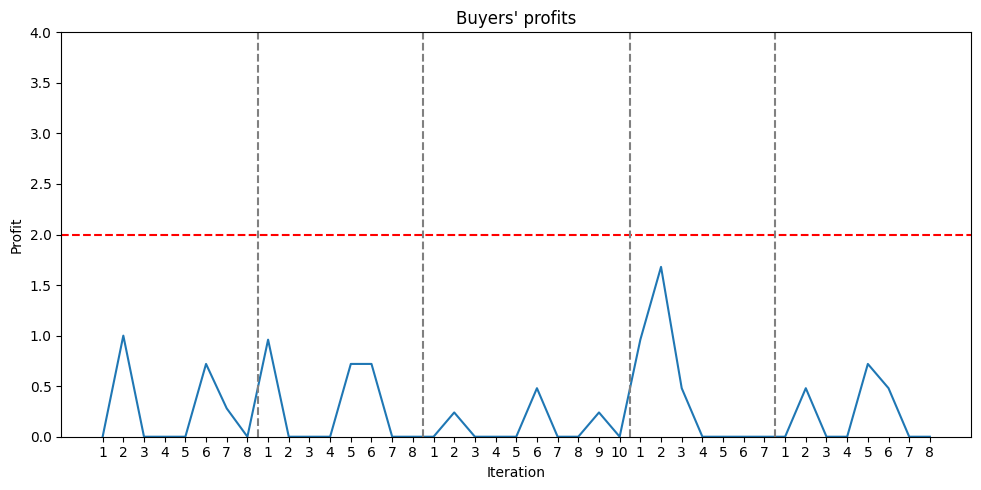

In [15]:
# plot the buyer profits
df_plot = df_profits.copy()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='buyer_profit', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Buyers' profits")
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

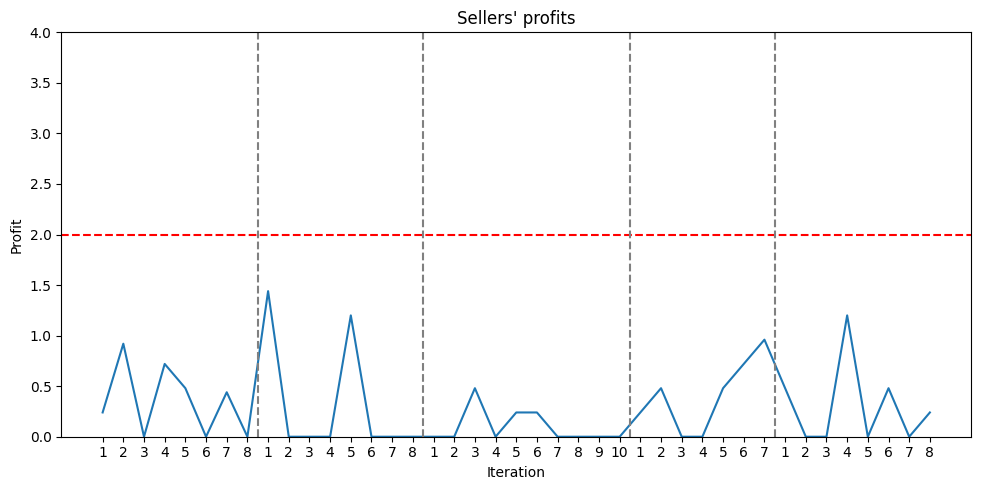

In [16]:
# plot the sellers profits
df_plot = df_profits.copy()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='seller_profit', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Sellers' profits")
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

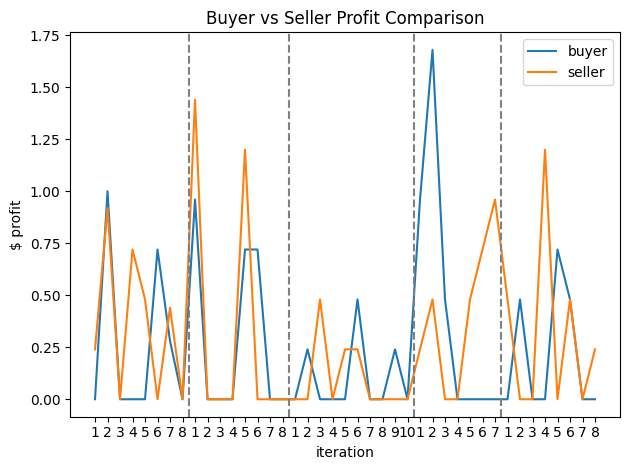

In [17]:
# plot buyer vs seller profits
df_plot = df_profits.copy()
plt.figure()
plt.plot(df_plot.index, df_plot['buyer_profit'], label=f'buyer')
plt.plot(df_plot.index, df_plot['seller_profit'], label=f'seller')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title(f"Buyer vs Seller Profit Comparison")
plt.ylabel("$ profit")
plt.xlabel("iteration")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# calculate announcer vs responder profits
df_profits['announcer_profit'] = np.where(
    df_profits['announcer'] == 'buyer',
    df_profits['buyer_profit'],
    df_profits['seller_profit']
)
df_profits['responder_profit'] = np.where(
    df_profits['announcer'] == 'seller',
    df_profits['buyer_profit'],
    df_profits['seller_profit']
)
df_profits

,round,iteration,buyer_profit,seller_profit,announcer,announcer_profit,responder_profit
0,1,1,0.00,0.24,buyer,0.00,0.24
1,1,2,1.00,0.92,seller,0.92,1.00
2,1,3,0.00,0.00,buyer,0.00,0.00
3,1,4,0.00,0.72,buyer,0.00,0.72
4,1,5,0.00,0.48,buyer,0.00,0.48
5,1,6,0.72,0.00,buyer,0.72,0.00
6,1,7,0.28,0.44,seller,0.44,0.28
7,1,8,0.00,0.00,seller,0.00,0.00
8,2,1,0.96,1.44,buyer,0.96,1.44
9,2,2,0.00,0.00,buyer,0.00,0.00


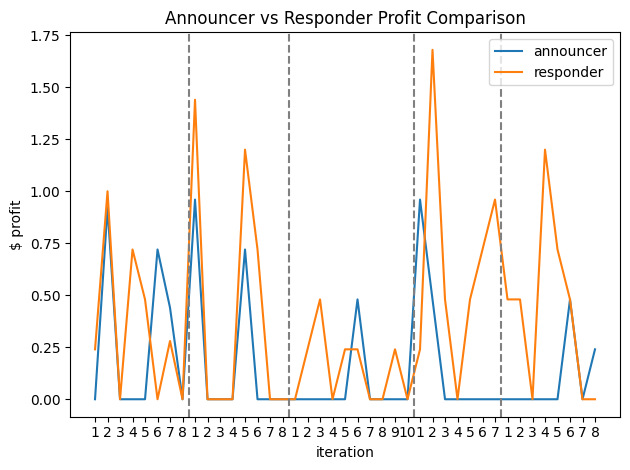

In [19]:
# plot announcer vs responders profits
df_plot = df_profits.copy()
plt.figure()
plt.plot(df_plot.index, df_plot['announcer_profit'], label=f'announcer')
plt.plot(df_plot.index, df_plot['responder_profit'], label=f'responder')
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title(f"Announcer vs Responder Profit Comparison")
plt.ylabel("$ profit")
plt.xlabel("iteration")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
n_transactions = len(df_data.loc[df_data['transaction']==True])
assert n_transactions == len(df_profits)
print(f"Number of successful transactions: {n_transactions}")

Number of successful transactions: 41


In [21]:
# profit statistics
announcer_zero_profit_mask = df_profits['announcer_profit']==0
responder_zero_profit_mask = df_profits['responder_profit']==0
buyer_annoucencer_mask = df_profits['announcer']=="buyer"
seller_annoucencer_mask = df_profits['announcer']=="seller"

zero_profit_share_announcers = len(df_profits.loc[announcer_zero_profit_mask])/n_transactions
zero_profit_share_responders = len(df_profits.loc[responder_zero_profit_mask])/n_transactions
average_profit_announcers = df_profits['announcer_profit'].mean()
average_profit_responders = df_profits['responder_profit'].mean()
print(f"Share of announcers whose profit is zero: {zero_profit_share_announcers:.2f}")
print(f"Share of responders whose profit is zero: {zero_profit_share_responders:.2f}")
print(f"Average profit for the announcers: ${average_profit_announcers:.2f}")
print(f"Average profit for the responders: ${average_profit_responders:.2f}")
print("\n")

zero_profit_share_announcers_buyers = len(df_profits.loc[(announcer_zero_profit_mask) & 
                                                         (buyer_annoucencer_mask)])/n_transactions
zero_profit_share_announcers_sellers = len(df_profits.loc[(announcer_zero_profit_mask) & 
                                                          (seller_annoucencer_mask)])/n_transactions
average_profit_announcers_buyers = df_profits.loc[buyer_annoucencer_mask, 'announcer_profit'].mean()
average_profit_announcers_sellers = df_profits.loc[seller_annoucencer_mask, 'announcer_profit'].mean()
print(f"Share of buy announcers whose profit is zero: {zero_profit_share_announcers_buyers:.2f}")
print(f"Share of sell announcers whose profit is zero: {zero_profit_share_announcers_sellers:.2f}")
print(f"Average profit for the announcer buyers: ${average_profit_announcers_buyers:.2f}")
print(f"Average profit for the announcer sellers: ${average_profit_announcers_sellers:.2f}")
print("\n")

zero_profit_share_responders_buyers = len(df_profits.loc[(responder_zero_profit_mask) & 
                                                         (seller_annoucencer_mask)])/n_transactions
zero_profit_share_responders_sellers = len(df_profits.loc[(responder_zero_profit_mask) & 
                                                          (buyer_annoucencer_mask)])/n_transactions
average_profit_responders_buyers = df_profits.loc[seller_annoucencer_mask, 'responder_profit'].mean()
average_profit_responders_sellers = df_profits.loc[buyer_annoucencer_mask, 'responder_profit'].mean()
print(f"Share of buy responders whose profit is zero: {zero_profit_share_responders_buyers:.2f}")
print(f"Share of sell responders whose profit is zero: {zero_profit_share_responders_sellers:.2f}")
print(f"Average profit for the responder buyers: ${average_profit_responders_buyers:.2f}")
print(f"Average profit for the responder sellers: ${average_profit_responders_sellers:.2f}")
print("\n")

share_of_buy_announcers = len(df_profits.loc[buyer_annoucencer_mask])/n_transactions
share_of_sell_announcers = len(df_profits.loc[seller_annoucencer_mask])/n_transactions
print(f"Share of buy announcers: {share_of_buy_announcers:.2f}")
print(f"Share of sell announcers: {share_of_sell_announcers:.2f}")


Share of announcers whose profit is zero: 0.76
Share of responders whose profit is zero: 0.41
Average profit for the announcers: $0.16
Average profit for the responders: $0.38


Share of buy announcers whose profit is zero: 0.49
Share of sell announcers whose profit is zero: 0.27
Average profit for the announcer buyers: $0.17
Average profit for the announcer sellers: $0.14


Share of buy responders whose profit is zero: 0.15
Share of sell responders whose profit is zero: 0.27
Average profit for the responder buyers: $0.39
Average profit for the responder sellers: $0.37


Share of buy announcers: 0.63
Share of sell announcers: 0.37


### Analyse Announcements and Responses

In [29]:
df_announcements = df_data.groupby(['round', 'iteration', 'announcement_type', 'announcing_agent_id'],
                as_index=False, sort=False).agg({
                    'price': 'first',
                    'announcement': 'count',
                    'announcing_agent_reservation_price': 'first',
                    'transaction': 'last'})

df_announcements = df_announcements.rename(columns={'announcement': 'n_responses'})
df_announcements

,round,iteration,announcement_type,announcing_agent_id,price,n_responses,announcing_agent_reservation_price,transaction
0,1,1,buy,6,2.24,2,2.24,True
1,1,2,sell,2,2.20,3,1.28,True
2,1,3,buy,0,0.80,9,0.80,True
3,1,4,buy,4,1.76,4,1.76,True
4,1,5,sell,10,3.20,7,3.20,False
...,...,...,...,...,...,...,...,...
111,5,10,buy,5,2.00,3,2.00,False
112,5,10,sell,10,3.20,3,3.20,False
113,5,10,buy,0,0.80,3,0.80,False
114,5,10,sell,7,2.48,3,2.48,False


In [30]:
df = df_announcements.copy()

buyers_announcing_res_price = len(df.loc[(df['announcement_type']=='buy') & 
                                                   (df['price']==df['announcing_agent_reservation_price'])])
buyers_announcing_res_price_share = buyers_announcing_res_price/len(df.loc[df['announcement_type']=='buy'])
sellers_announcing_res_price = len(df.loc[(df['announcement_type']=='sell') & 
                                                   (df['price']==df['announcing_agent_reservation_price'])])
sellers_announcing_res_price_share = sellers_announcing_res_price/len(df.loc[df['announcement_type']=='sell'])


print(f"Share of buy announcements equal to the reservation price: {buyers_announcing_res_price_share:.2f}")
print(f"Share of sell announcements equal to the reservation price: {sellers_announcing_res_price_share:.2f}")
print("\n")


share_accepted_offers_buyers = len(df.loc[(df['announcement_type']=='buy') &
                                                        (df['transaction']==True)])/len(df.loc[df['announcement_type']=='buy'])
share_accepted_offers_sellers = len(df.loc[(df['announcement_type']=='sell') &
                                                        (df['transaction']==True)])/len(df.loc[df['announcement_type']=='sell'])
print(f"Share of buy announcements which were accepted: {share_accepted_offers_buyers:.2f}")
print(f"Share of sell announcements which were accepted: {share_accepted_offers_sellers:.2f}")
print("\n")



Share of buy announcements equal to the reservation price: 0.89
Share of sell announcements equal to the reservation price: 0.90


Share of buy announcements which were accepted: 0.39
Share of sell announcements which were accepted: 0.30




In [31]:
df_announcements

,round,iteration,announcement_type,announcing_agent_id,price,n_responses,announcing_agent_reservation_price,transaction
0,1,1,buy,6,2.24,2,2.24,True
1,1,2,sell,2,2.20,3,1.28,True
2,1,3,buy,0,0.80,9,0.80,True
3,1,4,buy,4,1.76,4,1.76,True
4,1,5,sell,10,3.20,7,3.20,False
...,...,...,...,...,...,...,...,...
111,5,10,buy,5,2.00,3,2.00,False
112,5,10,sell,10,3.20,3,3.20,False
113,5,10,buy,0,0.80,3,0.80,False
114,5,10,sell,7,2.48,3,2.48,False


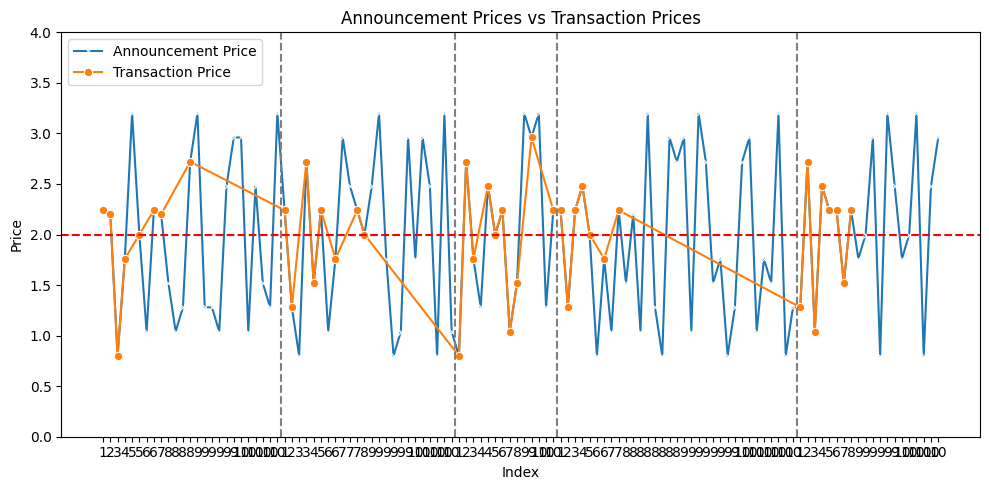

In [35]:
df_plot = df_announcements.copy()

plt.figure(figsize=(10, 5))

# --- Line 1: full data ---
sns.lineplot(
    x=df_plot.index, 
    y='price', 
    data=df_plot, 
    marker='x', 
    label='Announcement Price'
)

# --- Line 2: filtered subset ---
condition = df_plot['transaction'] == True
df_cond = df_plot[condition]

sns.lineplot(
    x=df_cond.index,
    y='price', 
    data=df_cond, 
    marker='o', 
    label='Transaction Price'
)

# --- Formatting ---
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.axhline(y=2, color='red', linestyle='--')
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title('Announcement Prices vs Transaction Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.ylim(0, 4)
plt.legend()
plt.tight_layout()
plt.show()

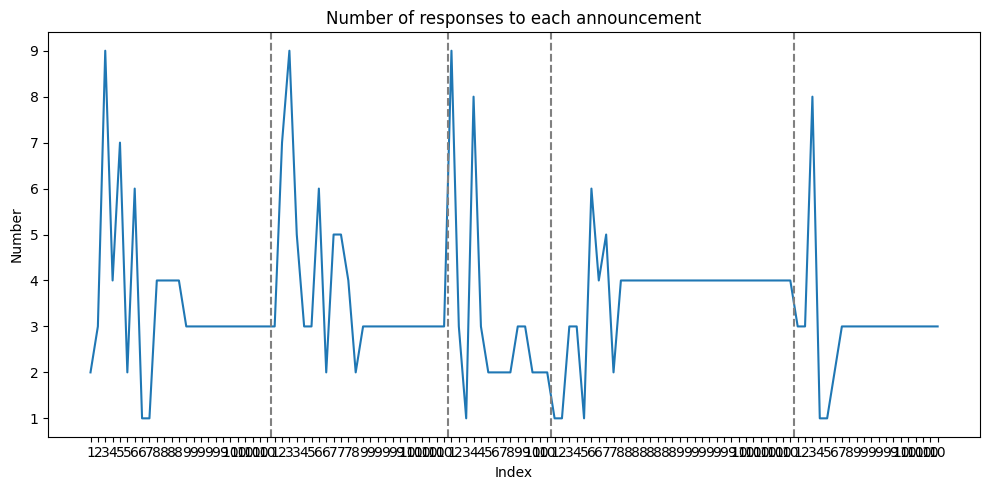

In [39]:
# plot number of responses to each announcement
df_plot = df_announcements.copy()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='n_responses', markers='x', 
                data=df_plot)
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Number of responses to each announcement")
plt.xlabel('Index')
plt.ylabel('Number')
plt.tight_layout()
plt.show()

<Axes: xlabel='price', ylabel='n_responses'>

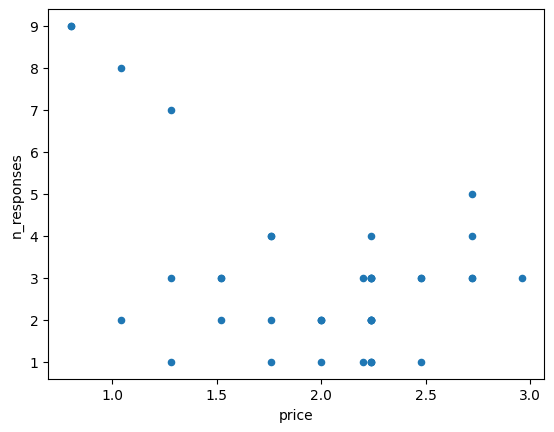

In [ ]:
# correlate number of responses with price scatter plot
df = df_announcements.copy()
df = df.loc[df['transaction']==True]
df.plot.scatter(x='price', y='n_responses')
# I'd expect a u-shaped pattern



### Analyse Agents' Histories

In [85]:
# d_announcements = {}
# for agent_id in range(0,11):
#     for agent_type in ['Buyer', 'Seller']:
#         df = df_data_agents.loc[
#             (df_data_agents['id']==agent_id) & 
#             (df_data_agents['type']==agent_type) & 
#             (df_data_agents['action']=='respond') & 
#             (df_data_agents['outcome']=='accepted')]
#         df.loc[:, 'counter'] = df.groupby(['type', 'id']).cumcount()
#         d_announcements[f'{agent_type}_{agent_id}'] = df


# agent_id = 3
# plt.figure()
# plt.plot(d_announcements[f'Buyer_{agent_id}']['counter'], d_announcements[f'Buyer_{agent_id}']['profit'], label=f'Buyer_{agent_id}')
# plt.plot(d_announcements[f'Seller_{agent_id}']['counter'], d_announcements[f'Seller_{agent_id}']['profit'], label=f'Seller_{agent_id}')
# plt.title(f"Acceptance Comparison by Responders")
# plt.ylabel("$ profit")
# plt.xlabel("Number of the consecutive accepted announcement")
# plt.legend()
# plt.tight_layout()
# plt.show()
